In [4]:
# Importing dependencies
import pandas as pd
import numpy as np
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')
from scipy.stats import linregress
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.ticker import StrMethodFormatter
from adjustText import adjust_text
from matplotlib.lines import Line2D # for the legend
from sklearn.linear_model import LinearRegression

In [5]:
# Reading .csv files
final_mean_df = pd.read_csv('Resources/final_combined_variables_world_happiness.csv')

# Creating data frames
countries_mean_df1 = pd.DataFrame(final_mean_df)
countries_mean_df1.head(10)
#countries_mean_df2.info()

,Unnamed: 0,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income per capita,GDP per capita,Consumer Price Inflation
0,1,Albania,ALB,europe,5.199,79.003400,4.60,14.0000,1.094844e+10,1.336520e+10,2.277370e+09
1,2,Algeria,DZA,africa,5.122,75.927400,2.56,10.5352,1.349940e+11,1.685580e+11,3.319580e+10
2,4,Armenia,ARM,europe,5.399,74.901800,4.06,18.1700,1.039242e+10,1.174083e+10,2.110668e+09
3,5,Australia,AUS,asia,7.162,82.599512,12.68,5.5620,1.040770e+12,1.340840e+12,2.701240e+11
4,6,Austria,AUT,europe,7.163,81.612683,15.44,5.3140,3.400930e+11,4.189360e+11,7.639420e+10
5,7,Azerbaijan,AZE,europe,5.173,72.313000,4.04,4.9420,3.473768e+10,4.541892e+10,1.061487e+10
6,8,Bahrain,BHR,asia,6.647,79.705400,8.14,1.1946,2.685674e+10,3.504294e+10,6.210128e+09
7,9,Bangladesh,BGD,asia,5.155,71.748400,3.52,4.3874,2.437060e+11,2.853370e+11,3.901580e+10
8,10,Belarus,BLR,europe,5.821,73.996585,23.16,5.2500,4.646153e+10,5.666898e+10,1.129095e+10
9,11,Belgium,BEL,europe,6.805,81.502927,18.76,6.9420,4.140940e+11,5.040590e+11,9.246720e+10


In [6]:
# remove duplicated columns
final_mean_df = final_mean_df.drop(columns=['Unnamed: 0'])
final_mean_df.head()

,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income per capita,GDP per capita,Consumer Price Inflation
0,Albania,ALB,europe,5.199,79.003400,4.60,14.0000,1.094844e+10,1.336520e+10,2.277370e+09
1,Algeria,DZA,africa,5.122,75.927400,2.56,10.5352,1.349940e+11,1.685580e+11,3.319580e+10
2,Armenia,ARM,europe,5.399,74.901800,4.06,18.1700,1.039242e+10,1.174083e+10,2.110668e+09
3,Australia,AUS,asia,7.162,82.599512,12.68,5.5620,1.040770e+12,1.340840e+12,2.701240e+11
4,Austria,AUT,europe,7.163,81.612683,15.44,5.3140,3.400930e+11,4.189360e+11,7.639420e+10


In [7]:
# Remove scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# Capitalize first letter of items in region category
final_mean_df['Region'] = final_mean_df['Region'].str.capitalize()
final_mean_df.head()

,Country Name,Country Code,Region,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income per capita,GDP per capita,Consumer Price Inflation
0,Albania,ALB,Europe,5.20,79.00,4.60,14.00,"10,948,438,941.00","13,365,200,472.00","2,277,370,027.00"
1,Algeria,DZA,Africa,5.12,75.93,2.56,10.54,"134,994,000,000.00","168,558,000,000.00","33,195,800,004.00"
2,Armenia,ARM,Europe,5.40,74.90,4.06,18.17,"10,392,423,379.00","11,740,832,933.00","2,110,667,535.00"
3,Australia,AUS,Asia,7.16,82.60,12.68,5.56,"1,040,770,000,000.00","1,340,840,000,000.00","270,124,000,000.00"
4,Austria,AUT,Europe,7.16,81.61,15.44,5.31,"340,093,000,000.00","418,936,000,000.00","76,394,200,001.00"


In [8]:
# verify that there is no null values 
final_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    111 non-null    object 
 1   Country Code                    111 non-null    object 
 2   Region                          111 non-null    object 
 3   Happiness Score                 111 non-null    float64
 4   Life Expectancy                 111 non-null    float64
 5   Suicide Rate                    111 non-null    float64
 6   Unemployment Rate               111 non-null    float64
 7   Net National Income per capita  111 non-null    float64
 8   GDP per capita                  111 non-null    float64
 9   Consumer Price Inflation        111 non-null    float64
dtypes: float64(7), object(3)
memory usage: 8.8+ KB


In [9]:
# save new csv file
final_mean_df.to_csv('Resources/final_mean_df.csv', index=True)

In [10]:
# create summary statistics 
final_mean_df.describe()

,Happiness Score,Life Expectancy,Suicide Rate,Unemployment Rate,Net National Income per capita,GDP per capita,Consumer Price Inflation
count,111.00,111.00,111.00,111.00,111.00,111.00,111.00
mean,5.63,73.10,10.32,7.08,"530,178,314,860.62","649,469,736,105.94","118,838,288,633.40"
std,1.06,7.58,9.29,5.28,"1,886,753,329,165.80","2,279,525,309,415.65","416,427,030,010.32"
min,3.27,52.33,1.54,0.31,"1,158,688,946.00","1,570,389,083.00","275,635,379.40"
25%,4.91,68.24,5.19,3.79,"19,097,670,016.50","23,043,522,533.50","4,088,895,786.00"
50%,5.74,74.38,8.14,5.45,"65,164,026,333.00","80,167,736,877.00","12,917,867,005.00"
75%,6.37,78.82,12.75,9.08,"281,631,500,000.00","343,480,500,000.00","61,445,000,001.00"
max,7.82,84.09,81.34,26.82,"16,846,900,000,000.00","19,658,500,000,000.00","3,641,200,000,000.00"


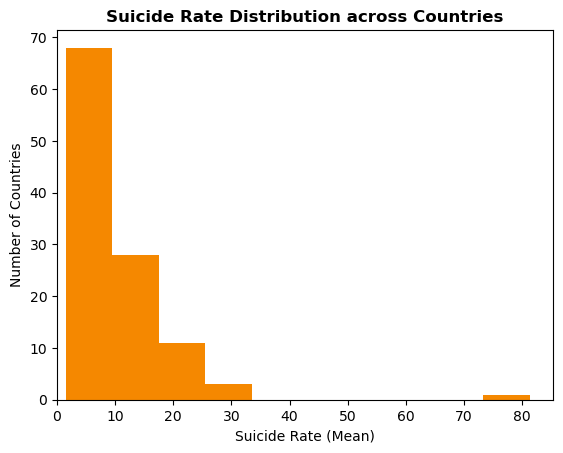

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [11]:
# create hist to show distribution of mean suicide rate across countries 
suicide_mean = final_mean_df['Suicide Rate']

plt.hist(final_mean_df['Suicide Rate'], color='#f58800')

plt.xlabel("Suicide Rate (Mean)")
plt.ylabel("Number of Countries")
#plt.ticklabel_format(useMathText=True)
plt.title('Suicide Rate Distribution across Countries', weight='bold', size=12)
plt.xlim(0)
plt.ylim(0)

plt.style.use('seaborn-notebook')
plt.show()
print(plt.style.available)

In [12]:
# Run the normality test on the whole Suicide_mean DataFrame                                                                           
print(st.normaltest(suicide_mean.sample(111)))
# If the p-value is 0.05 or lower, the result is trumpeted as significant, 
# but if it is higher than 0.05, the result is non-significant and tends to be passed over in silence

NormaltestResult(statistic=139.91007787729592, pvalue=4.158269258891959e-31)


In [13]:
# calculate standard dviation and mean of means
sd_sr = np.std(suicide_mean,ddof = 0)
mean_sr = np.mean(suicide_mean)
print(f"The suicide mean standard deviation is {sd_sr}")
print(f'The average suicide rating is {mean_sr}')

The suicide mean standard deviation is 9.243902061061858
The average suicide rating is 10.320900900900902


In [14]:
final_mean_df['Region'].value_counts()

Europe      35
Africa      30
Asia        27
Americas    19
Name: Region, dtype: int64

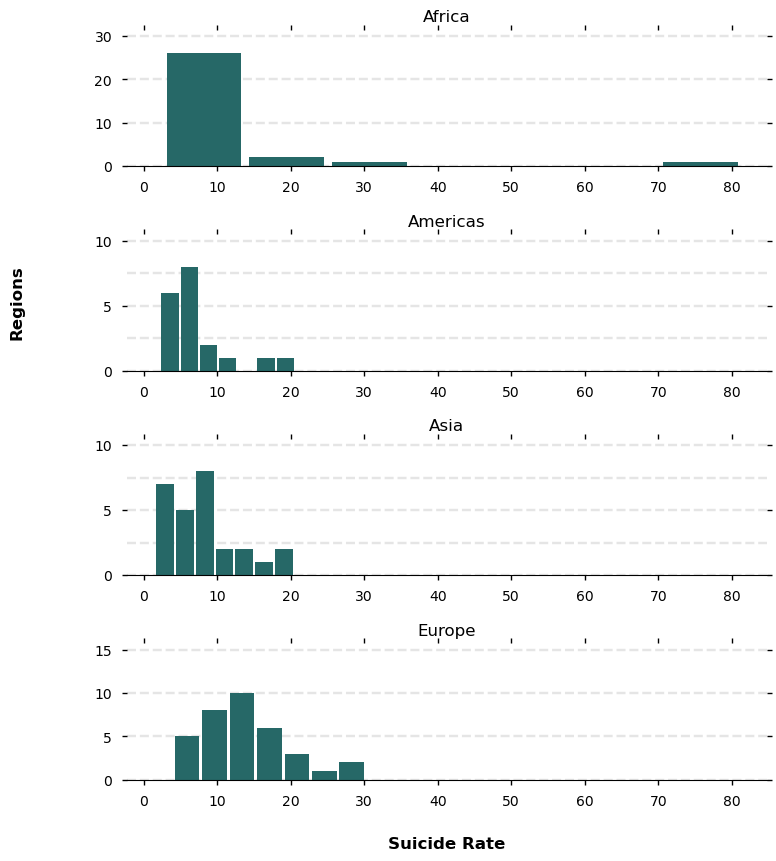

In [15]:
ax = final_mean_df.hist(column='Suicide Rate', by='Region', bins=7, grid=False, figsize=(8,10), layout=(4,1), sharex=True, color='#266867', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#BEBEBE', zorder=1)

    # Set x-axis label
    x.set_xlabel("Suicide Rate", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Regions", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
    x.tick_params(axis='x', rotation=0)

In [16]:
### Create a whole stocked horizontal bar to showcase top 10 countries with highest suicide ratings 


In [209]:
# function to plot Linear Regression
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    from matplotlib.pyplot import figure
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    fig = plt.figure(figsize=(12, 8))
    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata, color=COLORS, edgecolors=EDGECOLORS,
    s=300, alpha=0.5, zorder=10)
    plt.plot(xdata, regress_values, color='#a00705')
    ax.grid(axis='y', alpha=0.3)
    

    #plt.scatter(xdata,ydata, color=COLORS, edgecolors=EDGECOLORS,
    #s=300, alpha=0.5, zorder=10)
    #plt.grid(axis="y")
   # plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=27,color="#f58800")
    plt.ticklabel_format(useMathText=True)
    plt.ylim(0,90)
    plt.xlabel(xlbl, fontsize=18)
    plt.ylabel(ylbl, fontsize=18)
    fig.set_size_inches(15, 10)
        
    # Remove tick marks on both x and y axes
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)

    # Add grid lines, only for y axis

    # Remove all spines but keep the bottom one
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    plt.show()
    
    return line_eq, plt  
    

In [210]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], c[1] * amount, c[2])

In [211]:
# Okabe Ito colors
REGION_COLS = ["#051821", "#266867", "#f58800", "#f8bc24"]

# Category values for the colors
CATEGORY_CODES = pd.Categorical(final_mean_df['Region']).codes

# Select colors for each region according to its category.
COLORS = np.array(REGION_COLS)[CATEGORY_CODES]

# Compute colors for the edges: simply darker versions of the original colors
EDGECOLORS = [adjust_lightness(color, 0.6) for color in COLORS] 

The r-squared is: 0.34102888289366196


<Figure size 1200x800 with 0 Axes>

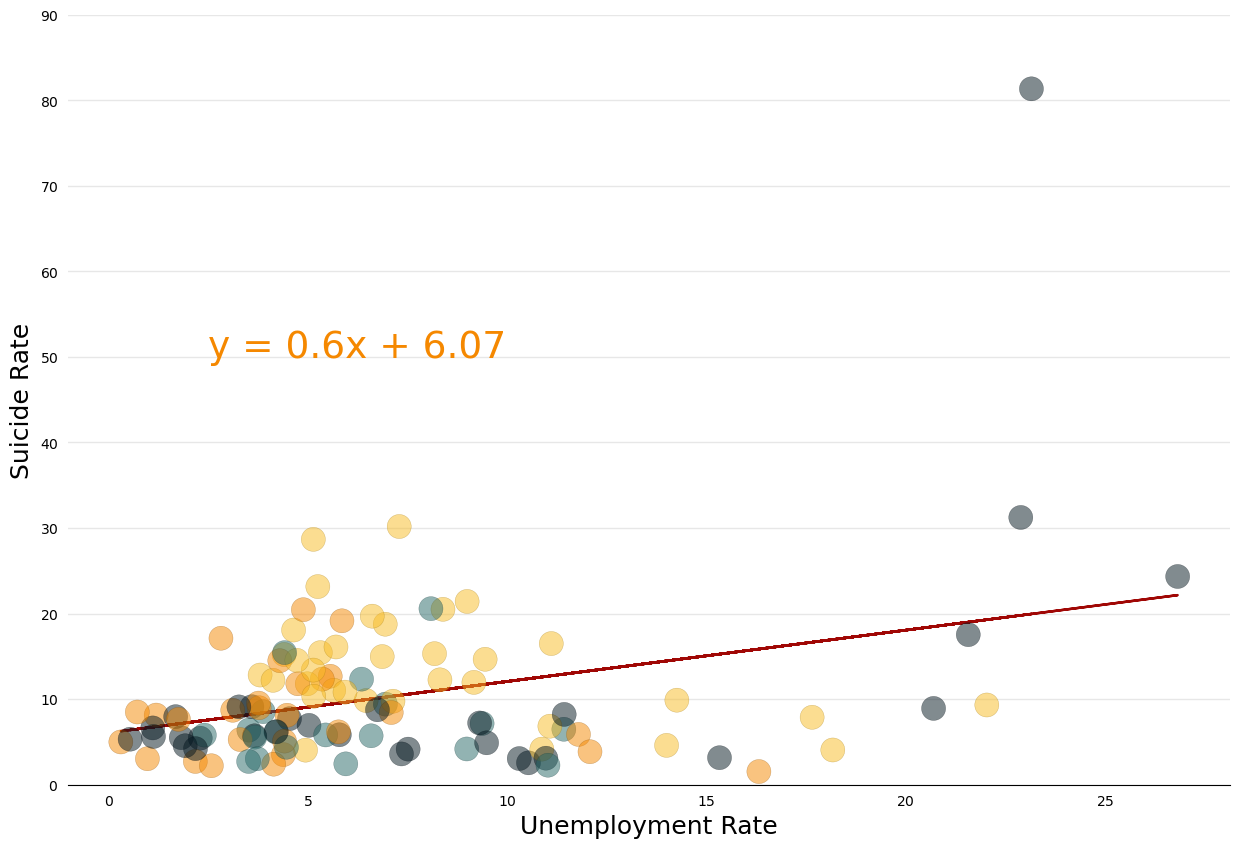

In [212]:
# Linear regression for Unemployment and Suicide Rate
xlbl = "Unemployment Rate"
ylbl = "Suicide Rate"
lblpos = (2.5, 50)
unemp_suic_plt = plotLinearRegression(final_mean_df['Unemployment Rate'],final_mean_df['Suicide Rate'],xlbl,ylbl,lblpos)


The r-squared is: -0.06989942586822688


<Figure size 1200x800 with 0 Axes>

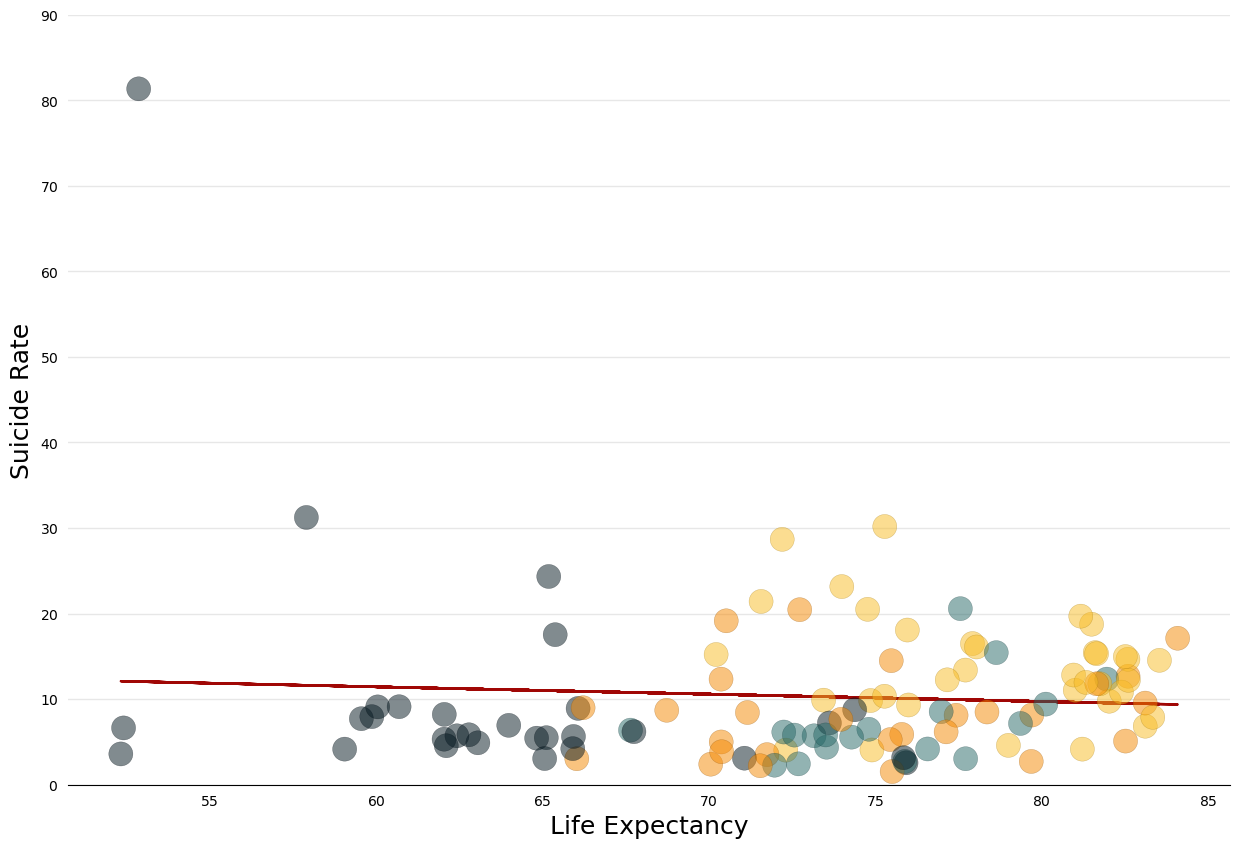

In [213]:
# Linear regression for Life Expectancy and Suicide Rate
xlbl = "Life Expectancy"
ylbl = "Suicide Rate"
lblpos = (2.5, 50)
lifeexp_suic_plt = plotLinearRegression(final_mean_df['Life Expectancy'],final_mean_df['Suicide Rate'],xlbl,ylbl,lblpos)
plt.show()

In [ ]:
# Linear regression for Net Income Mean and Suicide Rate
xlbl = "NetIncomeMean"
ylbl = "SuicideMean"
lblpos = (20, 50)
plotLinearRegression(combined_life_exp_suicide_unemploy_df2['NetIncomeMean'],combined_life_exp_suicide_unemploy_df2['SuicideMean'],xlbl,ylbl,lblpos,5)


In [ ]:
# Linear regression for Life Expectancy and Suicide Rate
xlbl = "Inflation"
ylbl = "SuicideMean"
lblpos = (20, 50)
plotLinearRegression(combined_life_exp_suicide_unemploy_df2['InflMean'],combined_life_exp_suicide_unemploy_df2['SuicideMean'],xlbl,ylbl,lblpos,5)


In [167]:
REGIONS = [
    "Africa", "Americas", "Asia", "Europe"]

# Create handles for lines.
handles = [
    Line2D(
        [], [], label=label, 
        lw=0, # there's no line added, just the marker
        marker="o", # circle marker
        markersize=10, 
        markerfacecolor=REGION_COLS[idx], # marker fill color
    )
    for idx, label in enumerate(REGIONS)
    ]

    # Append a handle for the line
        handles += [Line2D([], [], label="y ~ log(x)", color="#696969", lw=2)]

    # Add legend -----------------------------------------------------
    legend = fig.legend(
    handles=handles,
    bbox_to_anchor=[0.5, 0.95], # Located in the top-mid of the figure.
    fontsize=12,
    handletextpad=0.6, # Space between text and marker/line
    handlelength=1.4, 
    columnspacing=1.4,
    loc="center", 
    ncol=6,
    frameon=False
    )

    # Set transparency -----------------------------------------------
    # Iterate through first five handles and set transparency
    for i in range(5): 
    handle = legend.legendHandles[i]
    handle._legmarker.set_alpha(0.5)

fig

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)